In [ ]:
import numpy as np

/tmp/ipykernel_909166/3845588152.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_projection_left.set_xticklabels(
/tmp/ipykernel_909166/3845588152.py:200: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_projection_right.set_xticklabels(
/tmp/ipykernel_909166/3845588152.py:210: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


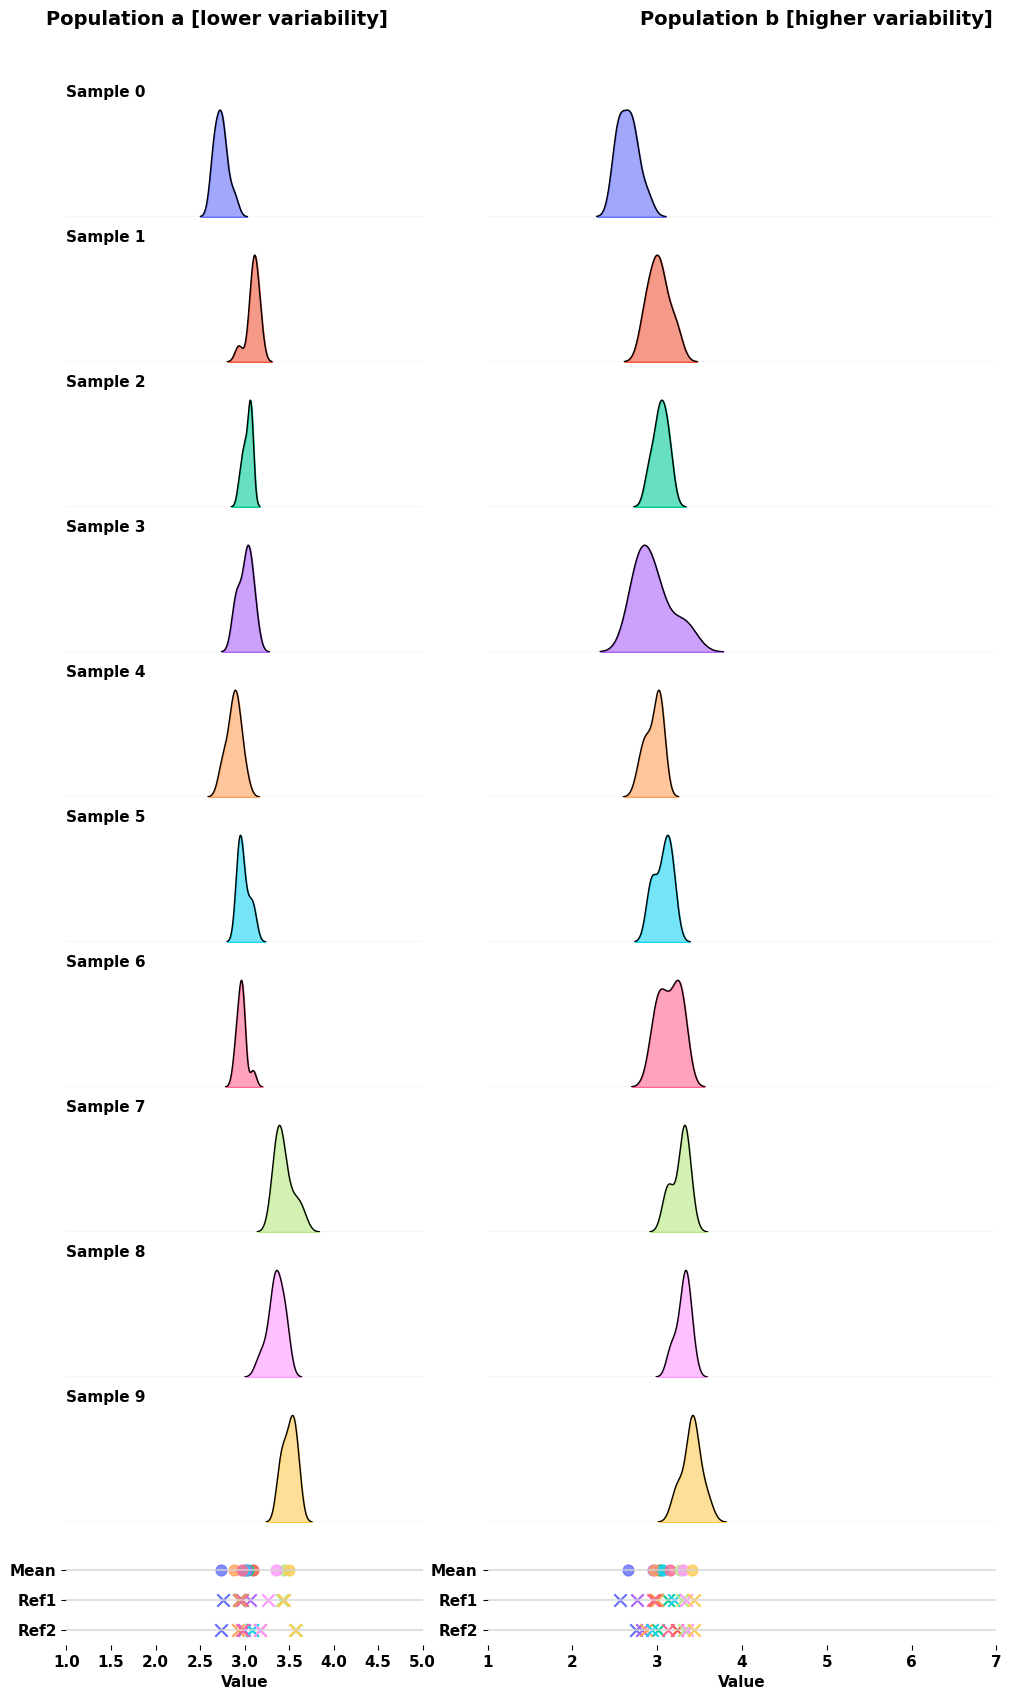

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
from matplotlib import gridspec

np.random.seed(42)


# ---- Generate distributions ----
n_samples = 10
n_dists = 10

# Base X positions (means)
X = np.linspace(2.8, 3.4, n_dists)

# --- APPLY FEEDBACK ---
# Add random offsets to Population A means to increase variability
# (so they're not perfectly aligned with Population B)
X_A = X + np.random.uniform(-0.25, 0.25, size=n_dists)  # random jitter in means
X_B = X + np.random.uniform(-0.15, 0.15, size=n_dists)  # smaller jitter for B

# Low and high variability distributions (Population A and B)
low_var_dists = np.random.normal(loc=X_A, scale=0.08, size=(n_samples, n_dists))  # ↑ mean variability, slightly ↑ sigma
high_var_dists = np.random.normal(loc=X_B, scale=0.12, size=(n_samples, n_dists))

colors_low = px.colors.qualitative.Plotly[:10]
colors_high = px.colors.qualitative.Plotly[:10]

# ---- Custom gridspec: 10 rows for KDE + 1 row for projections ----
fig = plt.figure(figsize=(12,20))
gs = gridspec.GridSpec(11, 2, height_ratios=[1]*10 + [0.8], width_ratios=[0.7, 1], 
                      hspace=0.3, wspace=0.15)

axes_left = [fig.add_subplot(gs[i, 0]) for i in range(10)]
axes_right = [fig.add_subplot(gs[i, 1]) for i in range(10)]
ax_projection_left = fig.add_subplot(gs[10, 0])
ax_projection_right = fig.add_subplot(gs[10, 1])

# ---- Set fixed x-range to zoom in/out ----
x_range_left = (1, 5)
x_range_right = (1, 7)

# Storage for projection values
left_means, left_ref1s, left_ref2s = [], [], []
right_means, right_ref1s, right_ref2s = [], [], []

# ---- Left panel: Low variability ----
for i, row in enumerate(low_var_dists.T):
    ax = axes_left[i]
    dist = row
    
    # Draw horizontal baseline
    ax.axhline(y=0, color='lightgray', linewidth=1, zorder=1)
    
    # Plot KDE
    sns.kdeplot(dist, fill=True, alpha=0.6, ax=ax, color=colors_low[i])
    sns.kdeplot(dist, ax=ax, color="k", lw=1)
    
    ax.set_title(f"Sample {i}",fontsize=11, fontweight='bold', loc='left')
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_yticks([])
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_xlim(x_range_left)
    
    # Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    # ---- Reference points ----
    mean_val = np.mean(dist)
    ref1 = dist[2]
    ref2 = dist[5]
    
    # ax.scatter(ref1, 0, color="red", marker="x", s=80, zorder=5)
    # ax.scatter(ref2, 0, color="blue", marker="x", s=80, zorder=5)
    
    # Store values for projection
    left_means.append(mean_val)
    left_ref1s.append(ref1)
    left_ref2s.append(ref2)

# ---- Right panel: High variability ----
for i, row in enumerate(high_var_dists.T):
    ax = axes_right[i]
    dist = row
    
    # Draw horizontal baseline
    ax.axhline(y=0, color='lightgray', linewidth=1, zorder=1)
    
    # Plot KDE
    sns.kdeplot(dist, fill=True, alpha=0.6, ax=ax, color=colors_high[i])
    sns.kdeplot(dist, ax=ax, color="k", lw=1)
    
    # ax.set_title(f"Sample {i}", fontsize=9)
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_yticks([])
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_xlim(x_range_right)
    
    # Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    # ---- Reference points ----
    mean_val = np.mean(dist)
    ref1 = dist[2]
    ref2 = dist[5]
    
    # ax.scatter(ref1, 0, color="red", marker="x", s=80, zorder=5)
    # ax.scatter(ref2, 0, color="blue", marker="x", s=80, zorder=5)
    
    # Store values for projection
    right_means.append(mean_val)
    right_ref1s.append(ref1)
    right_ref2s.append(ref2)

# ---- Projection panel for left (Low variability) ----
y_positions = [0.7, 0.5, 0.3]

# Plot three horizontal lines
for y_pos in y_positions:
    ax_projection_left.axhline(y=y_pos, color='lightgray', linestyle='-', alpha=0.7, 
                              linewidth=1.5)

# Project means (circles) - each with its distribution color
for i, mean_val in enumerate(left_means):
    ax_projection_left.scatter(mean_val, y_positions[0], 
                              color=colors_low[i], marker='o', s=60, alpha=0.8)

# Project ref1 (x markers) - each with its distribution color
for i, ref1_val in enumerate(left_ref1s):
    ax_projection_left.scatter(ref1_val, y_positions[1], 
                              color=colors_low[i], marker='x', s=80)

# Project ref2 (x markers) - each with its distribution color
for i, ref2_val in enumerate(left_ref2s):
    ax_projection_left.scatter(ref2_val, y_positions[2], 
                              color=colors_low[i], marker='x', s=80)

ax_projection_left.set_xlim(x_range_left)
ax_projection_left.set_ylim(0.2, 0.8)
ax_projection_left.set_yticks(y_positions)
ax_projection_left.set_yticklabels(['Mean', 'Ref1', 'Ref2'],fontsize=11, fontweight='bold')
ax_projection_left.set_xlabel('Value',fontsize=11, fontweight='bold')
# ax_projection_left.set_title('Projections', fontsize=11, fontweight='bold')

# Remove spines for projection panel
ax_projection_left.spines['top'].set_visible(False)
ax_projection_left.spines['right'].set_visible(False)
ax_projection_left.spines['left'].set_visible(False)
ax_projection_left.spines['bottom'].set_visible(False)
ax_projection_left.set_xticklabels(
    ax_projection_left.get_xticklabels(),
    fontsize=11,
    fontweight='bold'
)

# ---- Projection panel for right (High variability) ----
# Plot three horizontal lines
for y_pos in y_positions:
    ax_projection_right.axhline(y=y_pos, color='lightgray', linestyle='-', alpha=0.7, 
                               linewidth=1.5)

# Project means (circles) - each with its distribution color
for i, mean_val in enumerate(right_means):
    ax_projection_right.scatter(mean_val, y_positions[0], 
                               color=colors_high[i], marker='o', s=60, alpha=0.8)

# Project ref1 (x markers) - each with its distribution color
for i, ref1_val in enumerate(right_ref1s):
    ax_projection_right.scatter(ref1_val, y_positions[1], 
                               color=colors_high[i], marker='x', s=80)

# Project ref2 (x markers) - each with its distribution color
for i, ref2_val in enumerate(right_ref2s):
    ax_projection_right.scatter(ref2_val, y_positions[2], 
                               color=colors_high[i], marker='x', s=80)

ax_projection_right.set_xlim(x_range_right)
ax_projection_right.set_ylim(0.2, 0.8)
ax_projection_right.set_yticks(y_positions)
ax_projection_right.set_yticklabels(['Mean', 'Ref1', 'Ref2'],fontsize=11, fontweight='bold')
ax_projection_right.set_xlabel('Value',fontsize=11, fontweight='bold')
# ax_projection_right.set_title('Projections', fontsize=11, fontweight='bold')
# Set y tick labels with style

# Remove spines for projection panel
ax_projection_right.spines['top'].set_visible(False)
ax_projection_right.spines['right'].set_visible(False)
ax_projection_right.spines['left'].set_visible(False)
ax_projection_right.spines['bottom'].set_visible(False)
ax_projection_right.set_xticklabels(
    ax_projection_right.get_xticklabels(),
    fontsize=11,
    fontweight='bold'
)

# Add panel titles
fig.text(0.25, 0.92, "Population a [lower variability]", fontsize=14, fontweight='bold', ha='center')
fig.text(0.75, 0.92, "Population b [higher variability]", fontsize=14, fontweight='bold', ha='center')

plt.tight_layout()
plt.show()


In [ ]:
low_var_dists

In [ ]:
# -----------------------------------------------------------
#  COMPUTE SIGMA VALUES FOR LOW AND HIGH POPULATIONS
# -----------------------------------------------------------

# ---- LOW variability population ----

# 1. Variance within each sample (10 values per sample)
low_within_var_each = np.var(low_var_dists, axis=0, ddof=1)      # → length = 10

# 2. Average across samples
low_within_var_mean = np.mean(low_within_var_each)

# 3. Square root → this is your low_sigma_num
low_sigma_num = np.sqrt(low_within_var_mean)


# 4. Variance across samples for each “dot index” (10 dots)
low_across_var_each = np.var(low_var_dists, axis=1, ddof=1)      # → length = 10

# 5. Average across dot positions
low_across_var_mean = np.mean(low_across_var_each)

# 6. Square root → sigma_anat (low)
low_sigma_anat = np.sqrt(low_across_var_mean)



# ---- HIGH variability population ----

# 1. Variance within each sample
high_within_var_each = np.var(high_var_dists, axis=0, ddof=1)

# 2. Average across samples
high_within_var_mean = np.mean(high_within_var_each)

# 3. Square root → high sigma num
high_sigma_num = np.sqrt(high_within_var_mean)


# 4. Variance across samples for each dot index
high_across_var_each = np.var(high_var_dists, axis=1, ddof=1)

# 5. Average across dot positions
high_across_var_mean = np.mean(high_across_var_each)

# 6. Square root → sigma_anat (high)
high_sigma_anat = np.sqrt(high_across_var_mean)


print("Low σ_num      =", low_sigma_num)
print("Low σ_anat     =", low_sigma_anat)
print("High σ_num     =", high_sigma_num)
print("High σ_anat    =", high_sigma_anat)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.rcParams.update({
    'font.size': 20,           
    'font.weight': 'bold',     
    'axes.labelweight': 'bold',
    'axes.titlesize': 16,      
    'axes.titleweight': 'bold',
    'legend.fontsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
})

# Grid (σ_num and σ_anat both in [0.001, 1.5])
x = np.linspace(0.001, 1, 400)  # σ_num
y = np.linspace(0.001, 1, 400)  # σ_anat
X, Y = np.meshgrid(x, y)

# Variability ratio
Z = X / Y

fig, ax = plt.subplots(figsize=(16, 12))

# Log normalization for visibility
norm = LogNorm(vmin=0.01, vmax=1)
pcm = ax.pcolormesh(X, Y, Z, shading='auto', cmap='viridis', norm=norm)
cbar = fig.colorbar(pcm, ax=ax)
cbar.set_label(r'$\nu_{\mathrm{npv}} = \sigma_{\mathrm{num}}/\sigma_{\mathrm{pop}}$')

# Contours
contour_levels = [0.1, 0.2, 0.5, 1.0]
contours = ax.contour(X, Y, Z, levels=contour_levels, colors='black', 
                      linewidths=2.5, linestyles='solid', alpha=0.8)
ax.clabel(
    contours, inline=True, fontsize=18,
    fmt=lambda v: r"$\nu_{\mathrm{npv}}$=%.2f" % v, 
    inline_spacing=10, colors='black'
)

# Example points - Low and High variability cases
low_sigma_num, low_sigma_anat =0.075,  0.261
high_sigma_num, high_sigma_anat = 0.121, 0.244

# Compute their ratios
low_ratio = low_sigma_num / low_sigma_anat
high_ratio = high_sigma_num / high_sigma_anat

# Plot dots (corrected labels)
ax.scatter(
    low_sigma_num, low_sigma_anat,
    color='yellow', s=100, edgecolor='k',
    label=rf'Population A [Low variability ($\nu_{{\mathrm{{npv}}}}$={low_ratio:.3f})]',
    zorder=10
)

ax.scatter(
    high_sigma_num, high_sigma_anat,
    color='pink', s=100, edgecolor='k',
    label=rf'Population B [High variability ($\nu_{{\mathrm{{npv}}}}$={high_ratio:.3f})]',
    zorder=10
)


# # ---- ✨ Add text labels for ν_npv ----
# ax.text(low_sigma_num * 1.1, low_sigma_anat * 1.05, 
#         rf"$\nu_{{\mathrm{{npv}}}}$={low_ratio:.3f}",
#         color='blue', fontsize=13, fontweight='bold')

# ax.text(high_sigma_num * 1.1, high_sigma_anat * 0.95, 
#         rf"$\nu_{{\mathrm{{npv}}}}$={high_ratio:.3f}",
#         color='green', fontsize=13, fontweight='bold')

# Axes, title, legend
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.set_xlabel(r'$\sigma_{\mathrm{num}}$ (Numerical Variability)', fontsize=16)
ax.set_ylabel(r'$\sigma_{\mathrm{pop}}$ (Population Variability)', fontsize=16)
# ax.set_title("Variability Ratio Space", fontsize=14)
ax.grid(True, alpha=0.3)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=2
)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.rcParams.update({
    'font.size': 20,           
    'font.weight': 'bold',     
    'axes.labelweight': 'bold',
    'axes.titlesize': 16,      
    'axes.titleweight': 'bold',
    'legend.fontsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
})


# Parameters
sample_sizes = np.logspace(1, 5, 300)  # 10 → 100,000
variability_ratios = np.linspace(0.0, 1.0, 300)

# Compute Cohen's d
def cohens_d(n, vr):
    return (2 / np.sqrt(n)) * vr

# Create meshgrid
N, VR = np.meshgrid(sample_sizes, variability_ratios)
D = cohens_d(N, VR)
D_safe = np.maximum(D, 1e-5)

# ---- Plot Heatmap ----
plt.figure(figsize=(18, 14))
contourf = plt.contourf(
    N, VR, D_safe, levels=50, cmap="RdYlGn_r",
    norm=LogNorm(vmin=1e-5, vmax=1)
)

# ---- Add Isolines ----
contour_levels = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5]
contours = plt.contour(N, VR, D, levels=contour_levels, colors='black', 
                      linewidths=2.5, linestyles='solid', alpha=0.8)
plt.clabel(contours, inline=True, fontsize=18, fmt=lambda v: r"$\sigma_{\mathrm{d}}$=%.2f" % v, inline_spacing=10, colors='black' )


# ---- Replace horizontal lines with shaded dots ----
# Variability ratios
low_vr = 0.287
high_vr = 0.496

# Choose 6 sample sizes spaced evenly in log scale
dot_samples = np.logspace(np.log10(18), np.log10(10000), 6)



# Plot blue-shaded dots (low variability line)
for x in (dot_samples):
    plt.scatter(x, low_vr, color='orange', edgecolor='black', s=100, zorder=5)
    plt.vlines(x, ymin=0, ymax=high_vr, color='pink', linestyles='dotted', alpha=0.8)
    plt.text(x, -0.04, rf"$h_{{{int(x)}}}$", ha='center', va='top', fontsize=18, rotation=0, color='blue')
    # Vertical dotted lines for fixed variability ratios
    # plt.hlines(low_vr, xmin=10, xmax=100000, colors='orange', linestyles='dotted', linewidth=1.2, alpha=0.7)
    # plt.hlines(high_vr, xmin=10, xmax=100000, colors='pink', linestyles='dotted', linewidth=1.2, alpha=0.7)

# Plot green-shaded dots (high variability line)
for x in zip(dot_samples):
    plt.scatter(x, high_vr, color='pink', edgecolor='black', s=100, zorder=5)

# Legend handles (manually)
plt.scatter([], [], color='orange', edgecolor='black', s=80, label=r'Population A[small variabilty] ($\nu_{\mathrm{npv}}$=0.287)')
plt.scatter([], [], color='pink', edgecolor='black', s=80, label=r'Population B[high variabilty]($\nu_{\mathrm{npv}}$=0.496)')

# ---- Colorbar and Axis Labels ----
cbar = plt.colorbar(contourf, label=r"Cohen's d Variability ($\sigma_{\mathrm{d}}$, log scale)")

plt.xscale("log")
plt.xlabel("Sample Size (log scale)",labelpad=30)
plt.ylabel(r"Numerical-Population Variability Ratio ($\nu_{\mathrm{npv}}$)")
# plt.title(r"Cohen's d Variability ($\sigma_{\mathrm{d}}$) Across Sample Size and Variability Ratio")

plt.ylim(0, 1)
plt.xlim(10, 100000)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.12),
    ncol=2
)

plt.tight_layout()
plt.show()
